# Visualization with Matplotlib
In terms of plotting in python, Matplotlib is the most popular module for such purpose. Here we will demonstrate how we can use **Pyplot** in Matplotlib.

*Note: If you know MATLAB, you can do plotting in **MATLAB style**, i.e. work only on current figure and move on to next only after the current one is finished. However, the **object-oriented style** is better once the plots get complicated. Therefore the **object-oriented style** will be covered here.*

In [1]:
# Import libraries to handle data and do the plotting
import matplotlib.pyplot as plt # Matplotlib may build font cache for the first time
import numpy as np

## Simple line plot
For very simple line plots, the `plt.plot()` is a quick and convenient function to plot a curve.

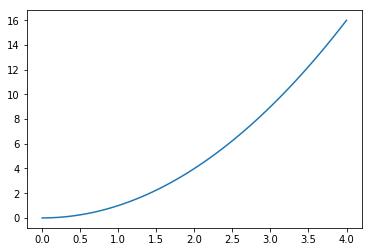

In [2]:
# First assign an evenly spaced array for x
x = np.linspace(0, 4, 100)
# Let's plot the y=x^2 curve. 
# The first two inputs of plt.plot() function are x and y values. 
plt.plot(x,x*x)

Most of the time, you would like to manually select the line/marker colours, types, etc. and add titles, axes titles, and probably some texts. 

Text(3.0, 35, '$y=e^x$')

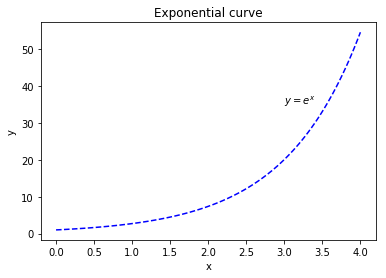

In [21]:
# Note that you need to copy the plt.plot function again to work on it
plt.plot(x,np.exp(x),
         'b--'
        )
# Add a title
plt.title('Exponential curve')
# Add a title for x-axis
plt.xlabel('x')
# Add a title for y-axis
plt.ylabel('y')
# Add the text "y=x^2" near the curve by specifying the position manually
# The inputs are x-, y-coordinates of the text, followed by the text string
plt.text(3.0,35,r'$y=e^x$')

You can also add multiple lines into the same plot by calling the plt.plot() function multiple times. Also you can add a legend to the plot, which uses labels in each `plt.plot()` function.

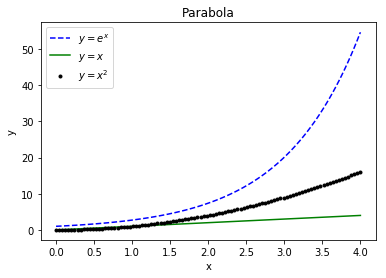

In [39]:
# Note that you need to copy the plt.plot function again to work on it
plt.plot(x,np.exp(x),
         'b--',
         label='$y=e^x$',
        )
# Add a title
plt.title('Parabola')
# Add a title for x-axis
plt.xlabel('x')
# Add a title for y-axis
plt.ylabel('y')
# use plt.plot() again to add new lines
plt.plot(x,x,
        'g-',
         label='$y=x$'
        )
plt.plot(x,x*x,
        'k.',
         label='$y=x^2$'
        )
# Add a legend, using labels defined in each of the plot functions
plt.legend()

Useful references:
- Types of Lines: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
- Types of Markers: https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
- Colors: https://matplotlib.org/2.0.2/api/colors_api.html

## Saving a plot
Use plt.savefig() to save your plot. I commonly use two inputs only: *figure_name.png* and *dpi*.

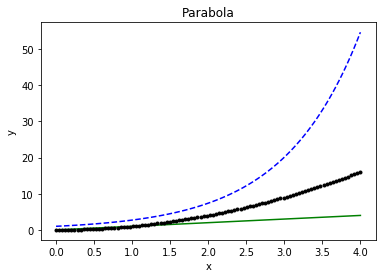

In [37]:
# Note that you need to copy the plt.plot function again to work on it
plt.plot(x,np.exp(x),
         'b--'
        )
# Add a title
plt.title('Parabola')
# Add a title for x-axis
plt.xlabel('x')
# Add a title for y-axis
plt.ylabel('y')
# use plt.plot() again to add new lines
plt.plot(x,x,
        'g-'
        )
plt.plot(x,x*x,
        'k.'
        )
# Save the figure. dpi means dots per inch. 
# I think 400 is a good compromise between file size and resolution. 
plt.savefig('sample_plot.png',dpi=400)

## 2D Field plots
To plot a 2D scalar field, e.g. temperature distribution, you may use:
- `plt.pcolormesh()` for coloured values over every quadrilateral (e.g. rectangular) mesh;
- `plt.contour()` for solid line contours; 
- `plt.contourf()` for filled contours.

Here is an example.

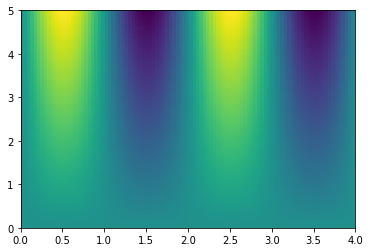

In [60]:
# Assign evenly spaced arrays for x and y
x = np.linspace(0,4,100)
y = np.linspace(0,5,80)
# Create a rectangular grid for the given x and y
xx, yy = np.meshgrid(x,y)
# Calculate z=y*sin(pi*x) and plot it
z = np.sin(np.pi*xx)*yy
plt.pcolormesh(xx,yy,z)

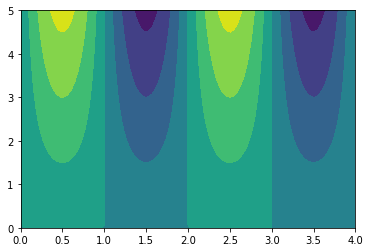

In [61]:
plt.contourf(xx,yy,z)

Similar to line plots, other elements can be added to the plot.

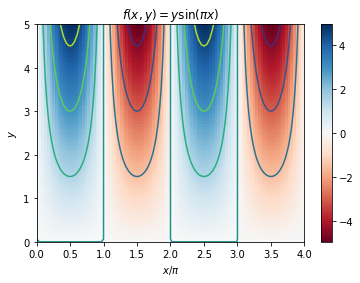

In [73]:
plt.pcolormesh(xx,yy,z,
              cmap = 'RdBu'
              )
# Add a colorbar
plt.colorbar()
# Add x-axis title
plt.xlabel('$x/\pi$')
# Add y-axis title
plt.ylabel('$y$')
# Add main title
plt.title('$f(x,y)=y\sin(\pi x)$')
# Add solid line contours
plt.contour(xx,yy,z)

Useful references:
- Colormaps: https://matplotlib.org/examples/color/colormaps_reference.html


## Vector field plots
To visualize vector fields, we usually use:
- `plt.quiver()` for plotting vector arrows
- `plt.streamplot()` for plotting streamlines (sometimes overlayed on filled contours showing magnitudes of vectors)

Sample script for quiver plots:

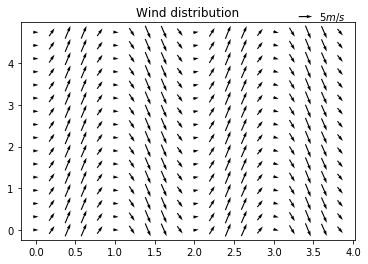

In [99]:
# Assign evenly spaced arrays for x and y
x = np.linspace(0,4,100)
y = np.linspace(0,5,80)
# Create a rectangular grid for the given x and y
xx, yy = np.meshgrid(x,y)
# Create a vector field with components u and v
# The u-component is a constant 2 everywher
u = np.ones(xx.shape)*2
# The v-component has a 5*sin(pi*x) dependence
v = np.sin(np.pi*xx)*np.ones(yy.shape)*5
# Quiver plot using object-oriented approach
# Create empty figure and axes objects
fig, ax = plt.subplots()
# Add main title
ax.set_title('Wind distribution')
# Plot 1 out of every 5 arrows, with each centered at the grid point
# Note: It's too compact to plot all arrows
Q = ax.quiver(xx[::5,::5],yy[::5,::5],u[::5,::5],v[::5,::5], 
           pivot='mid',
          )
# Add a reference vector of 5 m/s on top-right hand corner
qk = ax.quiverkey(Q, 0.8, 0.9, 5, '$5 m/s$', 
              labelpos='E',
              coordinates='figure',
             )

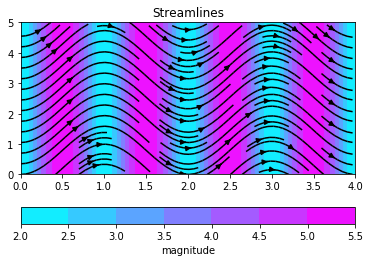

In [132]:
# Calculate the magnitudes of vectors
magnitude = np.sqrt(u*u + v*v)
# Plot the filled contours first
fig, ax = plt.subplots()
ax.set_title('Streamlines')
ax.set_ylim([0,5])
bg = ax.contourf(xx,yy,magnitude,
                 cmap = 'cool',
                )
# Add the colorbar
cbar = fig.colorbar(bg,
                    ax=ax,
                    orientation='horizontal',
                    label='magnitude',
                   )
# Overlay the streamline plot
streams = ax.streamplot(xx,yy,u,v, 
                        color = 'k',
                       )

## Advanced plotting: Object-oriented approach
To allow the plots to be more customizable and reproducible, you should use object-oriented approach to make plots. (Revision on objects: [Part 4: Objects](./Part4_OOP.ipynb))

There are two important object clasess, namely **figure** and **axes**. 

![Figure and Axes](./images/figure_and_axes.png)

![Figure Anatomy](./images/figure_anatomy.png)

In [128]:
def sample_plot():
    # First assign an evenly spaced array for x
    x = np.linspace(0, 4, 100)

    # Create an empty figure and empty axes 
    fig = plt.figure()
    ax = plt.axes()

    # Plot a line, the first two inputs are x and y values
    ax.plot(x, np.sin(x*np.pi), 
             '-', 
             label='sin'
            )
    # Use plot() again to overlay another plot
    ax.plot(x, np.cos(x*np.pi), 
             '--', 
             label='cos'
            )
    ax.legend() # display the "labels" specified in the above two lines

    ax.set_xlabel('$x/\pi$') # you can use Latex expressions! Just put formula inside $ $
    ax.set_ylabel('y')
    ax.set_title('Functions of sine and cosine') 
    return none

In [ ]:
sample_plot()

In [ ]:
with plt.xkcd():
    sample_plot()